# Reimer Lab Data

## 1. General Notes

- Task was originally attempted for both audio and visual blocks; however, **none of the mice in the visual blocks were able to learn the task**, so the data just contains audio blocks
- Stimulus saliency **changed across sessions** according to "staircase" rule: animals that started performing well on task were given lower stimulus saliency to increase difficulty
- This means that we should not assume performance statistics to be similar across sessions, even for same animal
- Currently, we only have pupil and walk data for four sessions where animal performed best
- `time` values in behavior, pupil and walk data are synced to the same clock

## 2. Directory structure

- Main directory has `behavior.csv` file, which contains behavior data for all subjects and sessions
- Pupil and walk data for subjects (in this case, `W2372` and `W2402`) is stored in separate folders
- Each subject folder has `pupil_preprocessed.csv` and `walk.csv` files for each session, along with `behavior.xls` file storing behavior data for subject (this is redundant)
- Main directory also has `Reimer AV Data Notes.docx` file, which explains structure of task

```
AV_Data_CSHL
├── behavior.csv
├── W2372
│   ├── W2372_28_df_pupil_preprocessed.csv
│   ├── W2372_28_df_walk.csv
│   ├── W2372_29_df_pupil_preprocessed.csv
│   ├── W2372_29_df_walk.csv
│   └── W2372_behavior.xlsx
├── W2402
│   ├── W2402_10_df_pupil_preprocessed.csv
│   ├── W2402_10_df_walk.csv
│   ├── W2402_9_df_pupil_preprocessed.csv
│   ├── W2402_9_df_walk.csv
│   └── W2402_behavior.xlsx
└── Reimer\ AV\ Data\ Notes.docx
```

## 3. Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.width', 100)

## 4. Specify data to load

In [3]:
# Directory where data is stored
DATA_FPATH = '/Users/cmcgrory/engel_lab/brainstate_dm/AV_Data_CSHL'

# Subject and session to inspect
SUBJECT_ID = 'W2372'
SESSION_ID = 28

# Path to behavior file (contains data for all subjects/sessions)
behavior_fpath = f'{DATA_FPATH}/behavior.csv'

# Paths to pupil and walk data for subject/session
prefix = f'{DATA_FPATH}/{SUBJECT_ID}/{SUBJECT_ID}_{SESSION_ID}_df'
pupil_fpath = f'{prefix}_pupil_preprocessed.csv'
walk_fpath = f'{prefix}_walk.csv'

## 5. Behavior data

### 5.1 Description

In this experiment, animals are trained to perform a decision-making task with both audio and visual stimuli. For each trial, the subject is exposed to an audio and a visual stimulus. Depending on the trial type, the audio stimulus can be either a target stimulus (a tone with background noise) or noise, and the visual stimulus can be either a target stimulus (vertical bars) or noise. 

In the initial design of the experiment, some animals were supposed to be rewarded for responding to the audio target stimulus, and others rewarded for responding to the visual target stimulus. However, for the data we have here, all animals have been conditioned to respond to the audio stimulus, making the visual "target" stimulus a distractor. 

![reimer_task.png](img/reimer_task.png)

### 5.2 Format

#### Data fields

| Column | Name           | Description                                                                                         |
|:-------|:---------------|:----------------------------------------------------------------------------------------------------|
| 0      | None           | Row index                                                                                           |
| 1      | `block`        | Reward structure of trial. If `block=0`, reward is based on audio stimulus; if `block=1`, visual    |
| 2      | `trial`        | Trial number                                                                                        |
| 3      | `trial_type`   | Code indicating which stimuli are present during trial (see table below)                            |
| 4      | `reward`       | `True` if reward is given, `False` if not                                                           |
| 5      | `trial_result` | Code indicating result of trial (see table below)                                                   |
| 6      | `hit`          | `(stimulus=True) AND (response=True)`                                                               |
| 7      | `miss`         | `(stimulus=True) AND (response=False)`                                                              |
| 8      | `fa`           | `(stimulus=False) AND (response=True)`  ("False Alarm")                                             |
| 9      | `cr`           | `(stimulus=False) AND (response=False)` ("Correct Reject")                                          |
| 10     | `stimulus`     | `True` if required stimulus (audio if `block=0`, visual if `block=1`) is present, `False` otherwise |
| 11     | `response`     | `True` if animal responds (licks), `False` otherwise                                                |
| 12     | `correct`      | `response == stimulus`                                                                              |
| 13     | `rt`           | Reaction time (sec) (`NaN` if `response=False`)                                                     |
| 14     | `subject_id`   | Subject ID (alphanumeric)                                                                           |
| 15     | `session_id`   | Session number                                                                                      |
| 16     | `time_trial`   | Time (sec) when trial began                                                                         |

#### `trial_type` values

| `trial_type` | Audio stimulus | Visual stimulus | 
|:-------------|:---------------|:----------------|
| 1            | `False`        | `True`          |
| 2            | `True`         | `False`         |
| 3            | `True`         | `True`          |
| 4            | `False`        | `False`         |

#### `result_type` values

| `result_type` | `stimulus` | `response` | Description      |
|:--------------|:-----------|:-----------|:-----------------|
| 0             | `True`     | `True`     | "hit"            |
| 1             | `True`     | `False`    | "miss"           |
| 2             | `False`    | `True`     | "false alarm"    |
| 3             | `False`    | `False`    | "correct reject" |


### 5.3 Load data

In [4]:
# Load behavior data for all subjects
df_behavior_all = pd.read_csv(behavior_fpath, header=0, index_col=0)

# Select data from specified subject
df_behavior = df_behavior_all.query('subject_id == @SUBJECT_ID and session_id == @SESSION_ID')
df_behavior

,block,trial,trial_type,reward,trial_result,hit,miss,fa,cr,stimulus,response,correct,rt,subject_id,session_id,time_trial
41735,0,1,3.0,0,1,False,True,False,False,True,False,False,NaN,W2372,28,5.421
41736,0,2,3.0,0,1,False,True,False,False,True,False,False,NaN,W2372,28,11.177
41737,0,3,3.0,4,0,True,False,False,False,True,True,True,0.205949,W2372,28,16.429
41738,0,4,3.0,4,0,True,False,False,False,True,True,True,0.031992,W2372,28,38.016
41739,0,5,2.0,4,0,True,False,False,False,True,True,True,0.228943,W2372,28,42.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42180,0,446,4.0,0,2,False,False,True,False,False,True,False,1.870532,W2372,28,3549.414
42181,0,447,4.0,4,3,False,False,False,True,False,False,True,NaN,W2372,28,3567.256
42182,0,448,4.0,4,3,False,False,False,True,False,False,True,NaN,W2372,28,3574.470
42183,0,449,4.0,0,2,False,False,True,False,False,True,False,0.399900,W2372,28,3581.353


## 6. Pupil data

### 6.1 Description

While the animals were completing the task, a high-resolution camera was used to record their eyes, and pupil area was extracted from these frames using an ellipse-fitting method described in [Mridha et al., 2021](https://www.nature.com/articles/s41467-021-21730-2). 

![fig_s3.png](img/fig_s3.png)

(Fig. S3 from Mridha et al., 2021)

### 6.2 Format

| Column | Name         | Description                                                                             |
|:-------|:-------------|:----------------------------------------------------------------------------------------|
| 0      | None         | Row index                                                                               |
| 1      | `time`       | Time of measurement (sec)                                                               |
| 2      | `pupil_x`    | x-coordinate of center of fitted ellipse (pixels)                                       |
| 3      | `pupil_y`    | y-coordinate of center of fitted ellipse (pixels)                                       |
| 4      | `blink`      | Boolean; if that data point was interpolated across (because of blinks or other issues) |
| 5      | `pupil_raw`  | Area of fitted ellipse (pixels)                                                         |
| 6      | `pupil`      | Area of fitted ellipse normalized to the max in that session (99.5th percentile)        |
| 7      | `eyelid_raw` | Area of fitted ellipse (pixels)                                                         |
| 8      | `eyelid`     | Area of fitted ellipse normalized to the max in that session (99.5th percentile)        |

### 6.3 Load data

In [5]:
df_pupil = pd.read_csv(pupil_fpath, header=0, index_col=0)
df_pupil

,time,pupil_x,pupil_y,blink,pupil_raw,pupil,eyelid_raw,eyelid
0,1.152785,340.02615,278.751,0.0,6722.788,0.341241,38137.438,0.832852
1,1.252785,340.02615,278.751,0.0,6722.788,0.341236,38137.438,0.832850
2,1.352785,340.02615,278.751,0.0,6722.788,0.341219,38137.438,0.832839
3,1.452785,340.02615,278.751,0.0,6722.788,0.341213,38137.438,0.832834
4,1.552785,340.02615,278.751,0.0,6722.788,0.341253,38137.438,0.832857
...,...,...,...,...,...,...,...,...
36098,3610.952785,340.02615,278.751,0.0,6722.788,0.341176,38137.438,0.832945
36099,3611.052785,340.02615,278.751,0.0,6722.788,0.341217,38137.438,0.832872
36100,3611.152785,340.02615,278.751,0.0,6722.788,0.341248,38137.438,0.832824
36101,3611.252785,340.02615,278.751,0.0,6722.788,0.341247,38137.438,0.832830


<AxesSubplot:xlabel='time'>

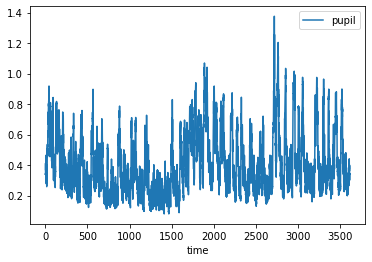

In [6]:
df_pupil.plot(x='time', y='pupil')

## 7. Walk data

### 7.1 Description

During the experiment, the locomotion of the animals (running on a treadmill) was recorded. 

### 7.2 Format

| Column | Name       | Description                       |
|:-------|:-----------|:----------------------------------|
| 0      | None       | Row index                         |
| 1      | `time`     | Time of measurement (sec)         |
| 2      | `velocity` | Velocity of walk (decimeters/sec) |
| 3      | `distance` | Distance walked (decimeters)      |

### 7.3 Load data

In [7]:
df_walk = pd.read_csv(walk_fpath, header=0, index_col=0)
df_walk

,time,velocity,distance
0,0.0,0.000798,0.000013
1,0.1,0.013860,0.000719
2,0.2,0.025089,0.001980
3,0.3,0.022633,0.002033
4,0.4,0.020176,0.002086
...,...,...,...
36132,3613.2,0.000000,6.612637
36133,3613.3,0.000000,6.612637
36134,3613.4,0.000000,6.612637
36135,3613.5,0.000000,6.612637


<AxesSubplot:xlabel='time'>

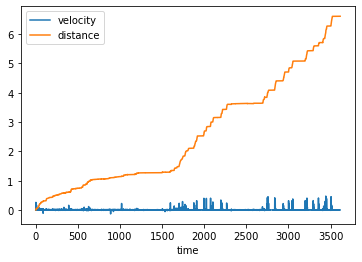

In [8]:
df_walk.plot(x='time', y=['velocity', 'distance'])